## Task 6: Create the Decision Tree classifier and visualize it graphically



In [1]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import graphviz 

import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

import pydotplus
from IPython.display import Image

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# load and read dataset

data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking the shape

data.shape

(150, 6)

In [4]:
# checking for missing values, size, datatypes etc

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#  drop id colcolumn 

data.drop(columns=['Id'], axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# getting a statistical summary

data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# data points count value for each label class

data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

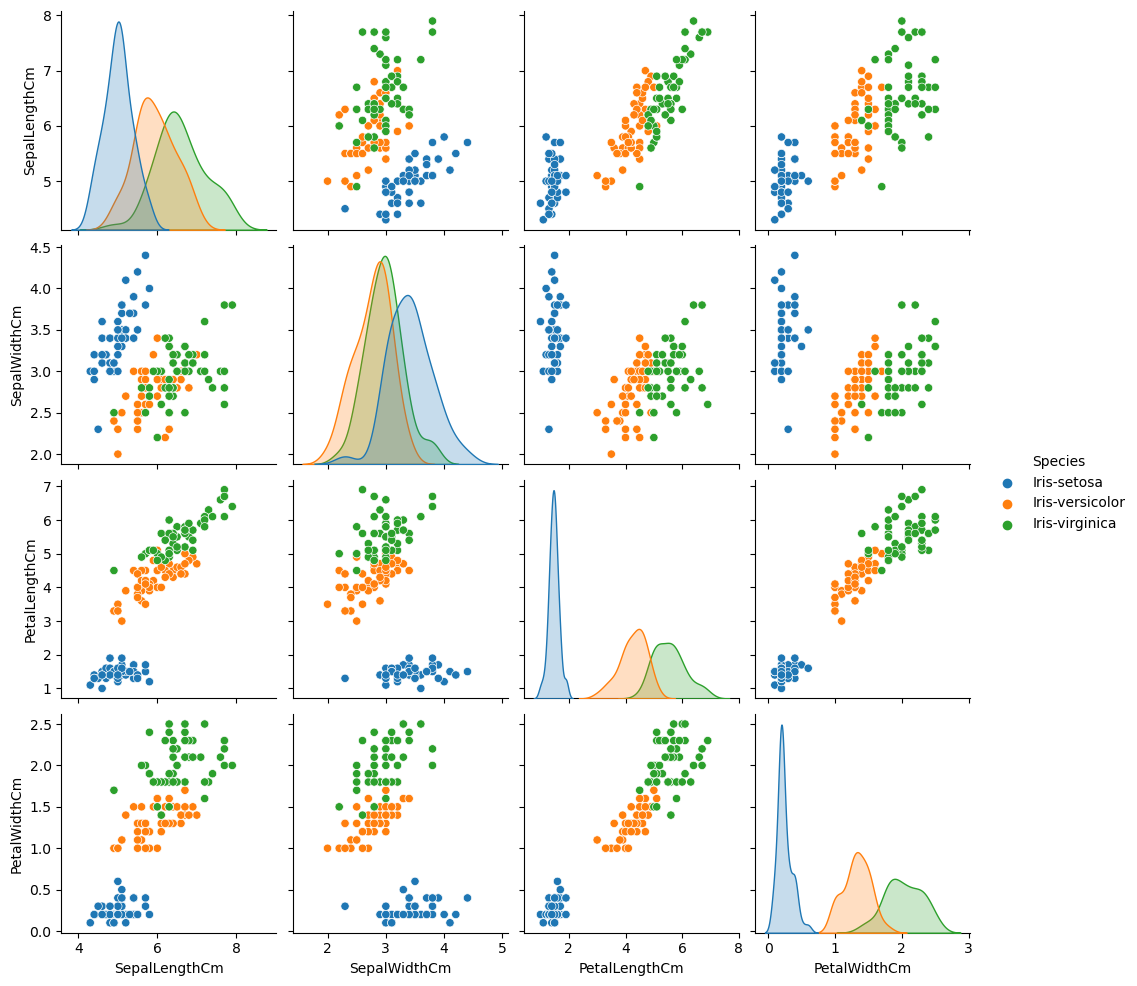

In [8]:
# pairplot

sns.pairplot(data = data, hue = 'Species')

In [9]:
# heatmap

# corr = data.corr()

# sns.heatmap(data.corr())

In [10]:
# creating the independent (X) and dependent (y) features

X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [11]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# training a DT model

classifier = DecisionTreeClassifier()

# fit the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# making predictions

y_pred = classifier.predict(X_test)

In [14]:
print("Model Accuracy Score on totally unseen data (X_test) is: ", (accuracy_score(y_test, y_pred) * 100), '%')

print(multilabel_confusion_matrix(y_test, y_pred))

Model Accuracy Score on totally unseen data (X_test) is:  100.0 %
[[[20  0]
  [ 0 10]]

 [[21  0]
  [ 0  9]]

 [[19  0]
  [ 0 11]]]


In [15]:
# visulizing the graph

# dot_data = StringIO()
# export_graphviz(
#     classifier, 
#     out_file = dot_data,
#     feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
#     filled = True, 
#     rounded = True,
#     special_characters = True
# )

# graph_1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph_1.create_png())

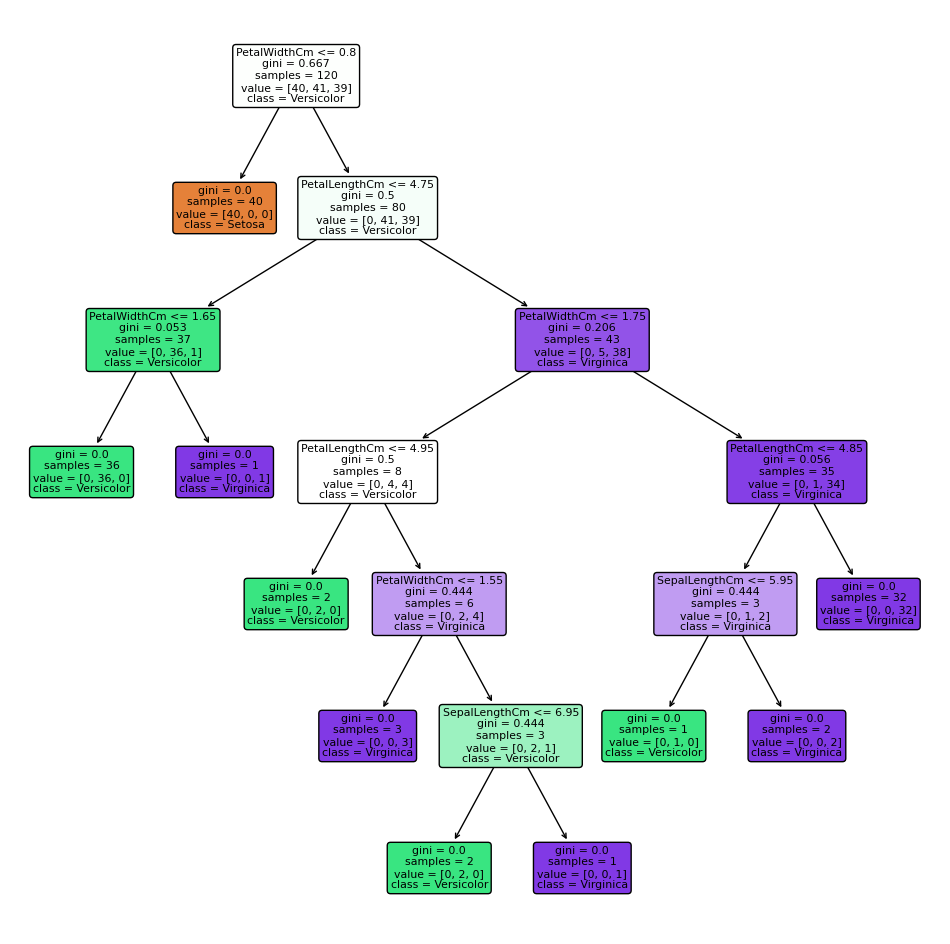

In [16]:
plt.figure(figsize=(12,12))
tree.plot_tree(classifier, 
               feature_names=data.columns, 
               class_names=['Setosa', 'Versicolor', 'Virginica'], 
               filled = True, 
               rounded=True);
plt.show()